In [232]:
# Import library
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, root_mean_squared_error


In [233]:
# Load dataset
data = pd.read_csv('../Dataset/Car Data.csv')
data.head(10)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


# Data cleaning

In [234]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [235]:
data.duplicated().sum()

0

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [237]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data preprocessing

In [238]:
# Separate target and features
# 'price' is the target variable, other columns are features
X = data.drop(['price', 'CarName', 'car_ID'], axis=1)  # Drop irrelevant columns
y = data['price']  # Define the target variable

# Split data
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
# Convert binary categorical columns to numeric (0 and 1)
for column in X_train.select_dtypes(include='object').columns:
  # Check if the column has 2 distinct values
    if X_train[column].nunique() == 2:
        X_train[column] = X_train[column].map({X_train[column].unique()[0]: 0,
                                                  X_train[column].unique()[1]: 1})

# One Hot Encode remaining categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the test set with the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Display the shape of the final datasets
print(f'Shape of X_train_encoded: {X_train_encoded.shape}')
print(f'Shape of X_test_encoded: {X_test_encoded.shape}')

Shape of X_train_encoded: (164, 42)
Shape of X_test_encoded: (41, 42)


In [240]:
X_train_encoded.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,0,0,0,0,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,72,4200,31,39,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
111,0,1,0,0,0,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,8.4,95,5000,19,24,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
153,0,1,0,0,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,62,4800,31,37,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
96,1,1,0,0,0,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,9.4,69,5200,31,37,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
38,0,1,0,1,0,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,9.0,86,5800,27,33,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [241]:
# Extract the company name from the 'CarName' column by taking the first word
data['company'] = data['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Normalize company names for consistency (e.g. changing 'vw' to 'volkswagen')
data['company'] = data['company'].replace('vw', 'volkswagen')


In [242]:
# Separate target and features
# 'price' is the target variable, other columns are features
X = data.drop(['price', 'CarName', 'car_ID'], axis=1)  # Drop irrelevant columns
y = data['price']  # Define the target variable

In [243]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns  # Categorical columns
numerical_features = X.select_dtypes(include=['number']).columns   # Numerical columns
print(categorical_features)

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'company'],
      dtype='object')


In [244]:
# Separate categorical features for different encoding
# One-Hot Encoding will be used for these features
features_one_hot = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                    'drivewheel', 'enginelocation','company']

# Label Encoding will be used for these features
features_label_encode = ['enginetype', 'cylindernumber', 'fuelsystem']

In [245]:
# Apply One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse
X_one_hot = encoder.fit_transform(X[features_one_hot])  # Apply One-Hot Encoding

# Convert encoded features to a DataFrame with appropriate column names
X_one_hot = pd.DataFrame(X_one_hot, columns=encoder.get_feature_names_out(features_one_hot))

In [246]:
# Apply Label Encoding
label_encoded_data = X[features_label_encode].apply(LabelEncoder().fit_transform)

In [247]:
# Combine all processed features
# Merge numerical features, One-Hot Encoded features, and Label Encoded features
X_final = pd.concat([X[numerical_features].reset_index(drop=True),
                     X_one_hot.reset_index(drop=True),
                     label_encoded_data.reset_index(drop=True)], axis=1)

In [248]:
X_final.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_maxda,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,enginetype,cylindernumber,fuelsystem
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,5
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,5
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,5
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,5
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,5


In [249]:
# Standardize numerical features
scaler = StandardScaler()
X_final[numerical_features] = scaler.fit_transform(X_final[numerical_features])

In [250]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


# Baseline Model

In [251]:
# Baseline Model: Linear Regression  
linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)  
y_pred_linear = linear_model.predict(X_test)  

In [252]:
# Baseline Model: Decision Tree  
tree_model = DecisionTreeRegressor(random_state=42)  
tree_model.fit(X_train, y_train)  
y_pred_tree = tree_model.predict(X_test) 

In [253]:
# Function to evaluate models  
def evaluate_model(y_true, y_pred):  
    mse = mean_squared_error(y_true, y_pred)  
    mae = mean_absolute_error(y_true, y_pred)  
    r2 = r2_score(y_true, y_pred)  
    rmse = np.sqrt(mse)  
    return mse, mae, r2, rmse  

In [254]:
# Evaluate Baseline Models  
print("Baseline Model: Linear Regression")  
mse_linear, mae_linear, r2_linear, rmse_linear = evaluate_model(y_test, y_pred_linear)  
print(f"MSE: {mse_linear}, MAE: {mae_linear}, R²: {r2_linear}, RMSE: {rmse_linear}")  

print("\nBaseline Model: Decision Tree")  
mse_tree, mae_tree, r2_tree, rmse_tree = evaluate_model(y_test, y_pred_tree)  
print(f"MSE: {mse_tree}, MAE: {mae_tree}, R²: {r2_tree}, RMSE: {rmse_tree}")  

Baseline Model: Linear Regression
MSE: 8635315.599260274, MAE: 1924.6354090745788, R²: 0.8906146975662165, RMSE: 2938.590750557191

Baseline Model: Decision Tree
MSE: 8920432.77077778, MAE: 1955.955292682927, R²: 0.8870030602523262, RMSE: 2986.709354921865


# Ensemble Model

In [255]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  
# Ensemble Model: Random Forest  
rf_model = RandomForestRegressor(random_state=42)  
rf_model.fit(X_train, y_train)  
y_pred_rf = rf_model.predict(X_test)  

# Ensemble Model: Gradient Boosting  
gb_model = GradientBoostingRegressor(random_state=42)  
gb_model.fit(X_train, y_train)  
y_pred_gb = gb_model.predict(X_test)

In [256]:
# Evaluate Ensemble Models  
print("\nEnsemble Model: Random Forest")  
mse_rf, mae_rf, r2_rf, rmse_rf = evaluate_model(y_test, y_pred_rf)  
print(f"MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}, RMSE: {rmse_rf}")  

print("\nEnsemble Model: Gradient Boosting")  
mse_gb, mae_gb, r2_gb, rmse_gb = evaluate_model(y_test, y_pred_gb)  
print(f"MSE: {mse_gb}, MAE: {mae_gb}, R²: {r2_gb}, RMSE: {rmse_gb}")  


Ensemble Model: Random Forest
MSE: 3270513.5657405513, MAE: 1284.3570650406505, R²: 0.9585717381848826, RMSE: 1808.4561276792288

Ensemble Model: Gradient Boosting
MSE: 5688260.734184312, MAE: 1684.4564843522494, R²: 0.9279456421043526, RMSE: 2385.0074914314864


# Hyperparameter tunning

In [257]:
# Define the model  
rf_model_ht = RandomForestRegressor(random_state=42)  

# Define the hyperparameter grid without 'auto'  
param_grid = {  
    'n_estimators': [100, 200, 300],  # Number of trees in the forest  
    'max_features': ['sqrt', 'log2'],  # Valid options for max_features  
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree  
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node  
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node  
}  

# Set up the GridSearchCV  
grid_search = GridSearchCV(estimator=rf_model_ht, param_grid=param_grid,  
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')  

# Fit the model  
grid_search.fit(X_train, y_train)  

# Get the best parameters and best score  
best_params = grid_search.best_params_  
best_score = -grid_search.best_score_  

print(f"Best Parameters: {best_params}")  
print(f"Best Cross-Validated MSE: {best_score}")  

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated MSE: 7928139.697254566


In [258]:
# Evaluate the best model on the test set  
best_rf_model = grid_search.best_estimator_  
y_pred = best_rf_model.predict(X_test)  

# Calculate evaluation metrics  
mse = mean_squared_error(y_test, y_pred)  
mae = mean_absolute_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f"Test Set MSE: {mse}")  
print(f"Test Set MAE: {mae}")  
print(f"Test Set R²: {r2}")

Test Set MSE: 6608761.063089249
Test Set MAE: 1528.565324189208
Test Set R²: 0.9162854768550027


# Feature Importance

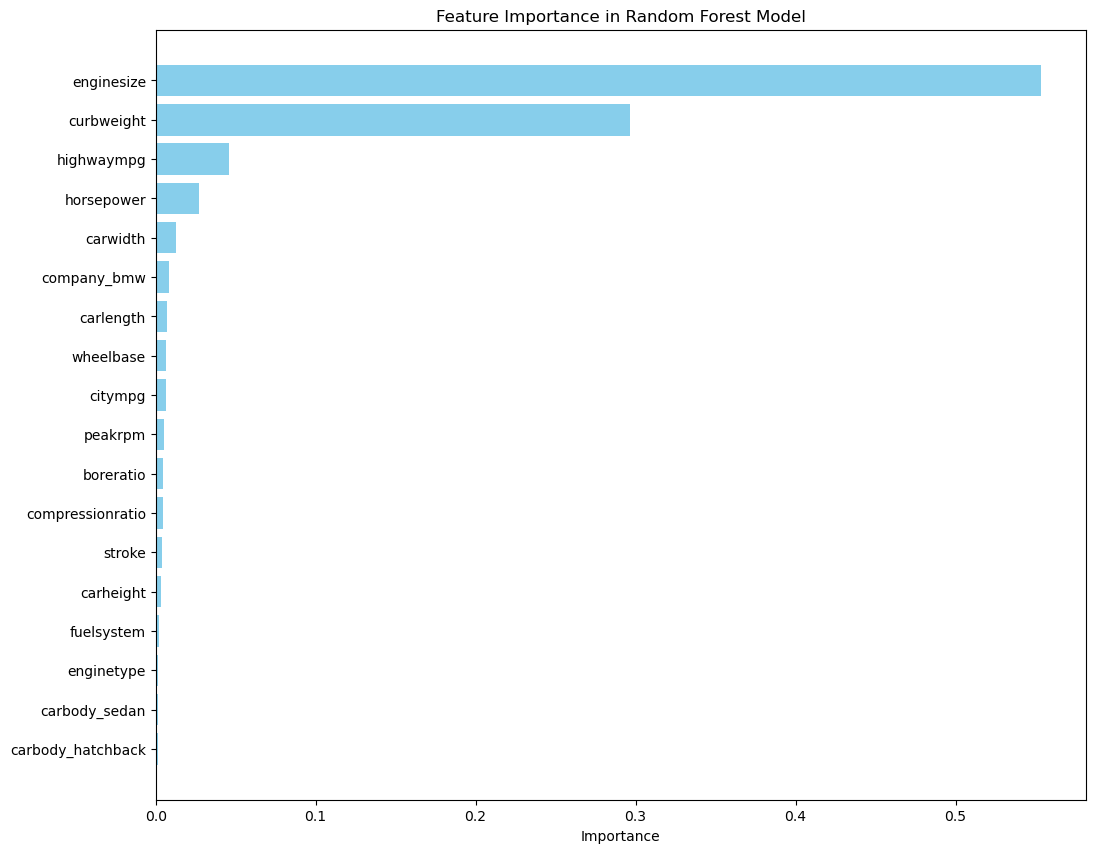

In [261]:
import matplotlib.pyplot as plt  

# Feature Importance  
importances = rf_model.feature_importances_  
feature_names = X_train.columns  

# Create a DataFrame for visualization  
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})  

# Filter features with importance > 0.01  
filtered_features = feature_importance_df[feature_importance_df['Importance'] > 0.001]  

# Sort the filtered features by importance
filtered_features = filtered_features.sort_values(by='Importance', ascending=False)

# Plotting the filtered feature importances  
plt.figure(figsize=(12, 10))  
plt.barh(filtered_features['Feature'], filtered_features['Importance'], color='skyblue')  
plt.xlabel('Importance')  
plt.title('Feature Importance in Random Forest Model')  
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top  
plt.show()